In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [3]:
#Read Data
df=pd.read_csv('FMCG_data.csv')
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


# Exploratory Data Analysis

In [4]:
df.head()


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [5]:
df.shape

(25000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
print(df.columns)

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


# Droping Not Corelated columns

In [10]:
df=df.drop(columns=['Ware_house_ID','WH_Manager_ID'])

In [11]:
df=df.drop(columns=['wh_est_year'])

In [12]:
#Droping not corelated columns in test_df
df=df.drop(columns=['distributor_num','retail_shop_num','dist_from_hub','workers_num','govt_check_l3m'])

# Data Preprocessing/Outlier detected

In [13]:
#Government certificate count
df['approved_wh_govt_certificate'].fillna(method='ffill',inplace=True )

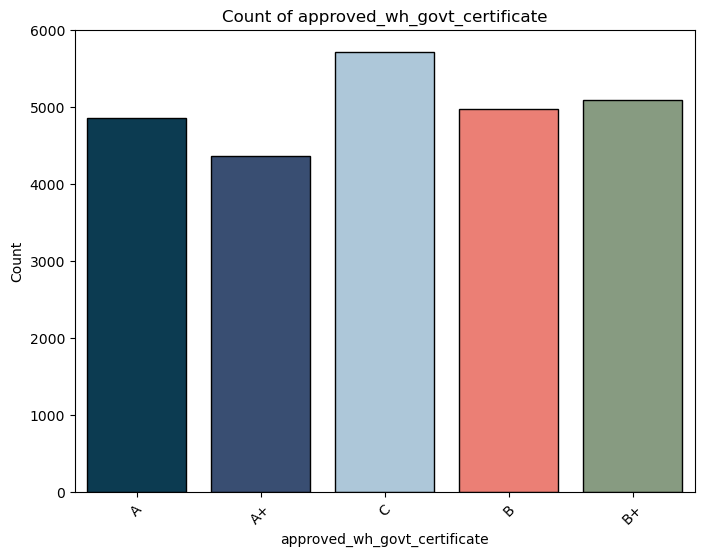

In [16]:
#create count plot
plt.figure(figsize=(8,6))
colors=['#003f5c', '#2f4b7c', '#a5c8e1', '#ff6f61', '#84a07c']
sns.countplot(data=df, x='approved_wh_govt_certificate', edgecolor='black', palette=colors)
plt.title('Count of approved_wh_govt_certificate')
plt.xlabel('approved_wh_govt_certificate')  
plt.ylabel('Count')  
plt.xticks(rotation=45)
plt.show()

# Storage issue report

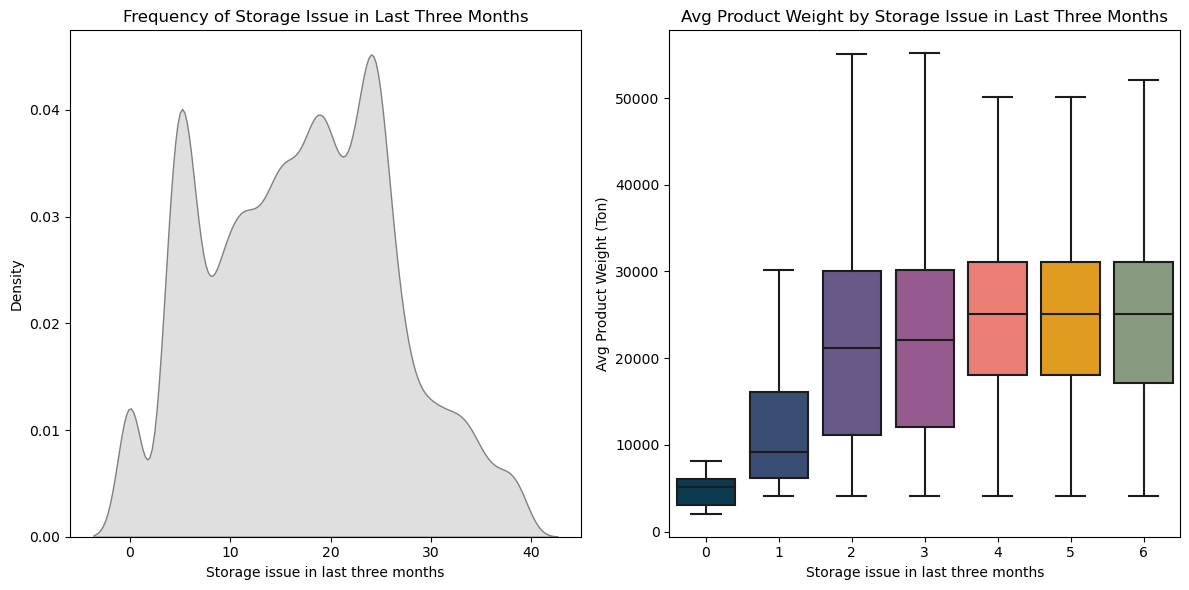

In [20]:

colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#ff6f61', '#ffa600', '#84a07c', '#a5c8e1']

# Setup subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first KDE plot
sns.kdeplot(data=df, x='storage_issue_reported_l3m', fill=True, ax=axes[0], color='grey')
axes[0].set_xlabel('Storage issue in last three months')  # Corrected the spelling
axes[0].set_ylabel('Density')  # Corrected the spelling
axes[0].set_title('Frequency of Storage Issue in Last Three Months')

# Plotting the second box plot
sns.boxplot(data=df, x='wh_breakdown_l3m', y='product_wg_ton', showfliers=False, palette=colors, ax=axes[1])
axes[1].set_xlabel('Storage issue in last three months')  # Corrected the spelling
axes[1].set_ylabel('Avg Product Weight (Ton)')  # Corrected the spelling
axes[1].set_title('Avg Product Weight by Storage Issue in Last Three Months')

plt.tight_layout()
plt.show()



# Warehouse breakdown 3 month

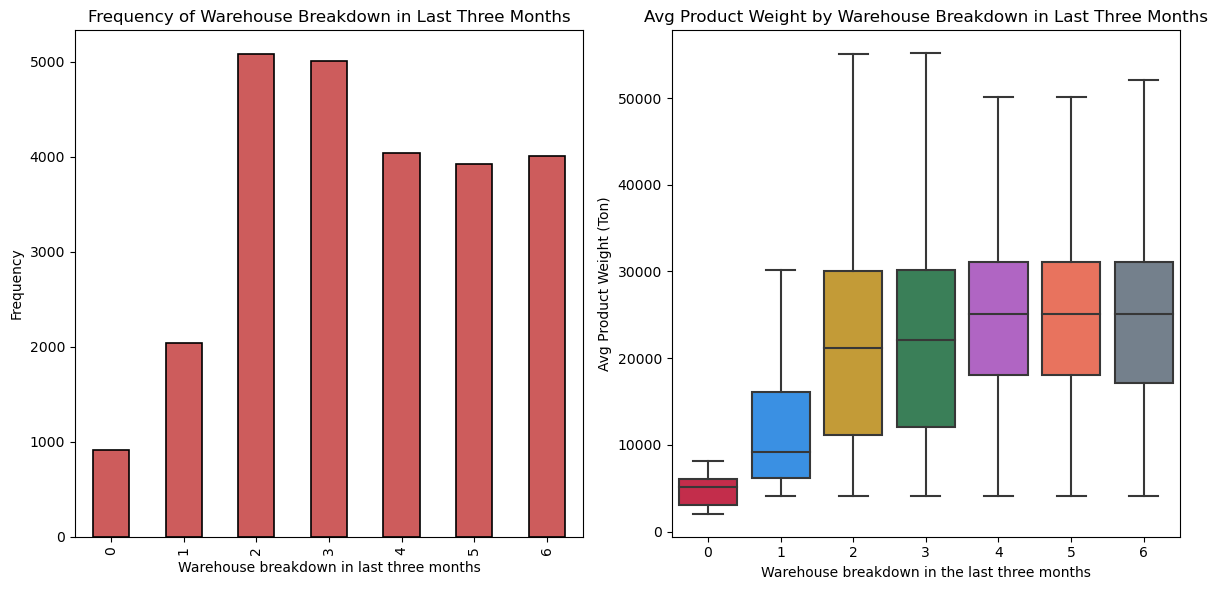

In [25]:
# Set up colors and subplots
colors = ['#DC143C', '#1E90FF', '#DAA520', '#2E8B57', '#BA55D3', '#FF6347', '#708090', '#FF8C00']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
df['wh_breakdown_l3m'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#CD5C5C', edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Warehouse breakdown in last three months')  # Corrected the spelling
axes[0].set_ylabel('Frequency')  # Corrected the spelling
axes[0].set_title('Frequency of Warehouse Breakdown in Last Three Months')

# Plotting the second box plot
sns.boxplot(data=df, x='wh_breakdown_l3m', y='product_wg_ton', showfliers=False, palette=colors, ax=axes[1])
axes[1].set_xlabel('Warehouse breakdown in the last three months')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Warehouse Breakdown in Last Three Months')

# Adjusting the layout
plt.tight_layout()
plt.show()

# temperature regulating machine

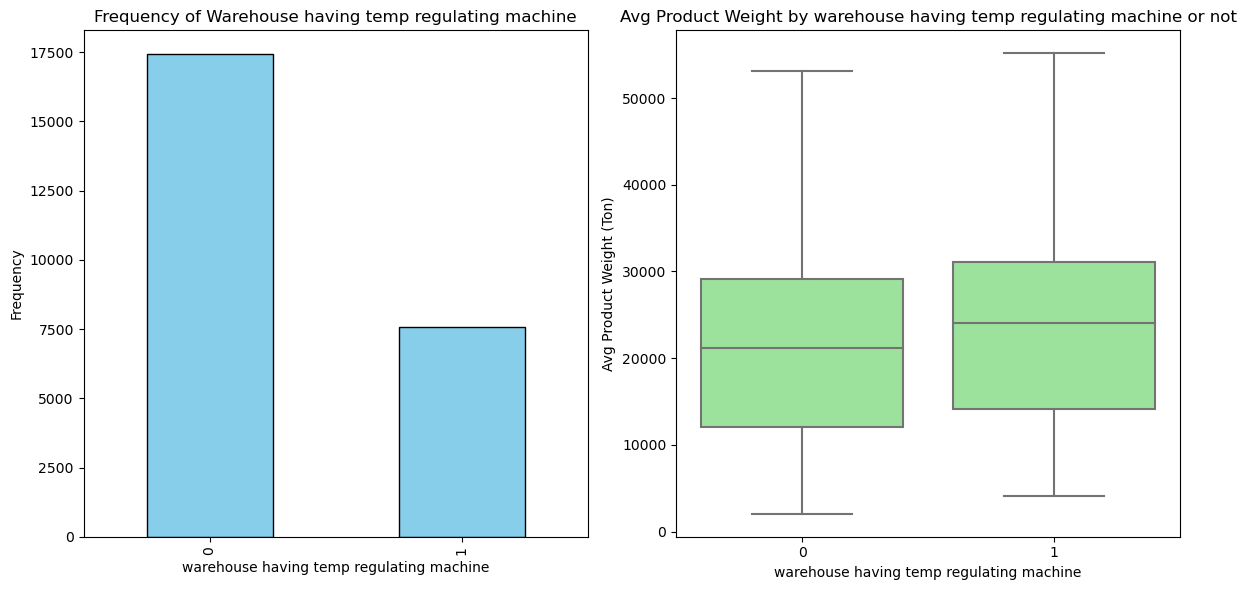

In [26]:
# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
df['temp_reg_mach'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue', ax=axes[0])
axes[0].set_xlabel('warehouse having temp regulating machine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Warehouse having temp regulating machine')

# Plotting the second bar chart
sns.boxplot(data=df, x='temp_reg_mach', y='product_wg_ton', color='lightgreen', ax=axes[1])
axes[1].set_xlabel('warehouse having temp regulating machine')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by warehouse having temp regulating machine or not')

# Adjust layout for better visualization
plt.tight_layout()
#Show the plot
plt.show()

# Transport issues in last 1 year

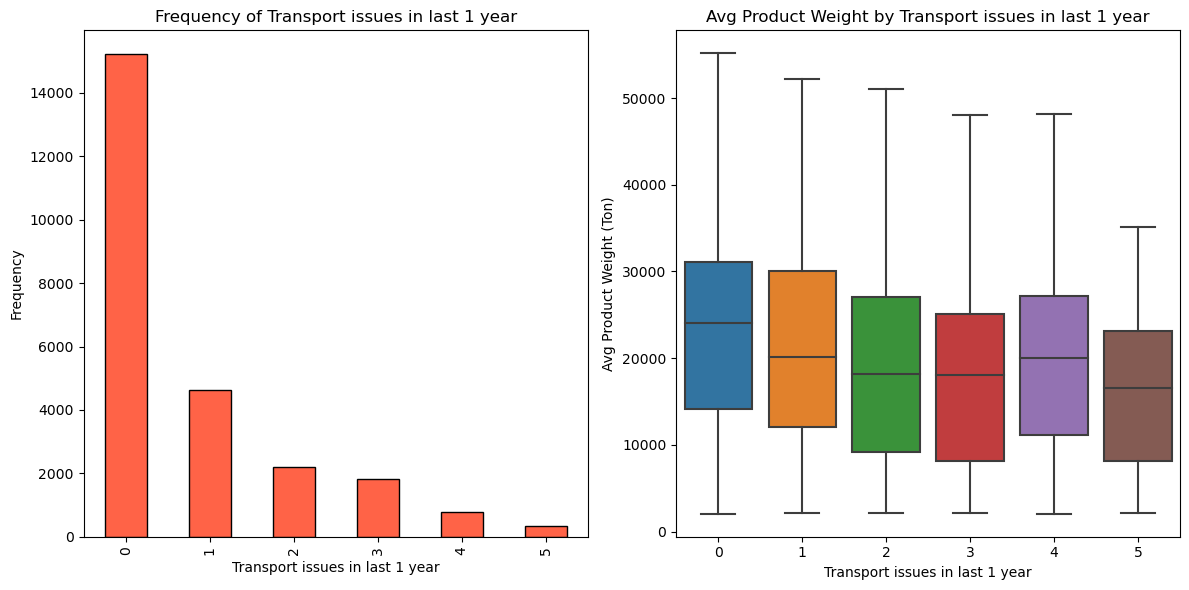

In [28]:
#Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first bar chart
df['transport_issue_l1y'].value_counts().sort_index().plot(kind='bar', color='tomato', edgecolor='black', ax=axes[0]) 
axes[0].set_xlabel('Transport issues in last 1 year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Transport issues in last 1 year')

# Plotting the second bar chart
order = df['transport_issue_l1y'].unique()
order.sort()
sns.boxplot(data=df, x='transport_issue_l1y', y='product_wg_ton', order=order, ax=axes[1])
axes[1].set_xlabel('Transport issues in last 1 year')
axes[1].set_ylabel('Avg Product Weight (Ton)')
axes[1].set_title('Avg Product Weight by Transport issues in last 1 year')

# Adjust layout for better visualization
plt.tight_layout()
# Show the plot
plt.show()

# Warehouse Location type

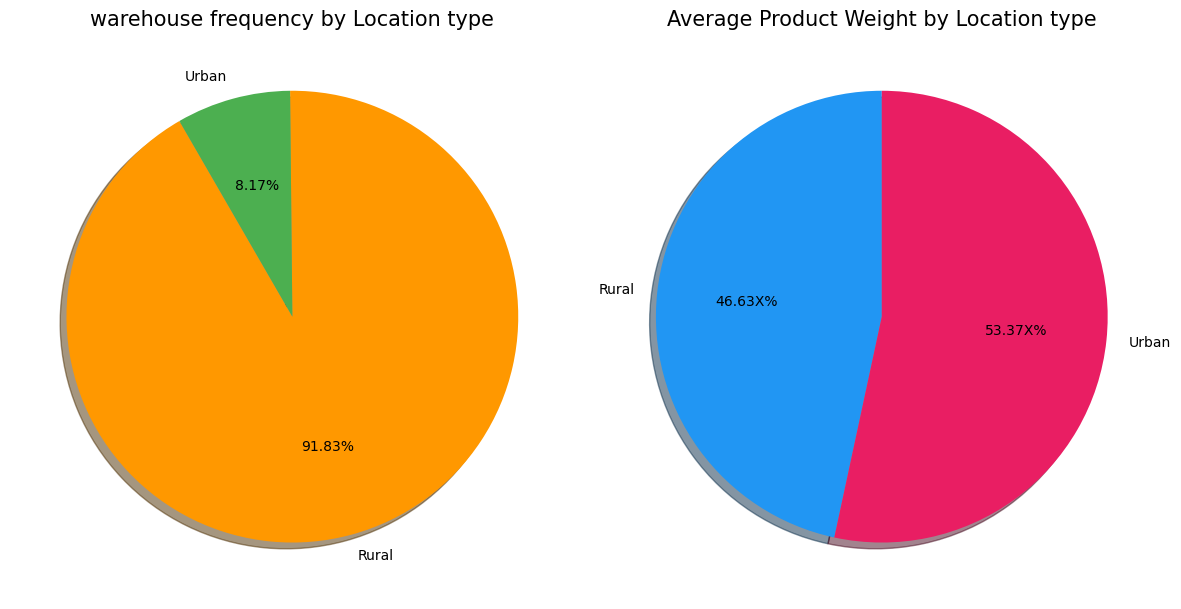

In [31]:
# Define the data and color codes
labels = ['Rural', 'Urban']
size_total = df['Location_type'].value_counts().tolist()

# Define new colors for the pie charts
colors_freq = ['#FF9800', '#4CAF50'] # Colors for frequency pie chart
colors_weight = ['#2196F3', '#E91E63'] # Colors for average product weight pie chart

size_mean = df.groupby('Location_type')['product_wg_ton'].mean().to_list()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#Pie chart for frequency
axes[0].pie(size_total, colors=colors_freq, labels=labels, autopct='%.2f%%', shadow=True, startangle=120)
axes[0].set_title('warehouse frequency by Location type', fontsize=15)

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors_weight, labels=labels, autopct='%.2fX%%', shadow=True, startangle=90)
axes[1].set_title('Average Product Weight by Location type', fontsize=15)
# Adjusting Layout 
plt.tight_layout()
plt.show()


# Warehouse Zone

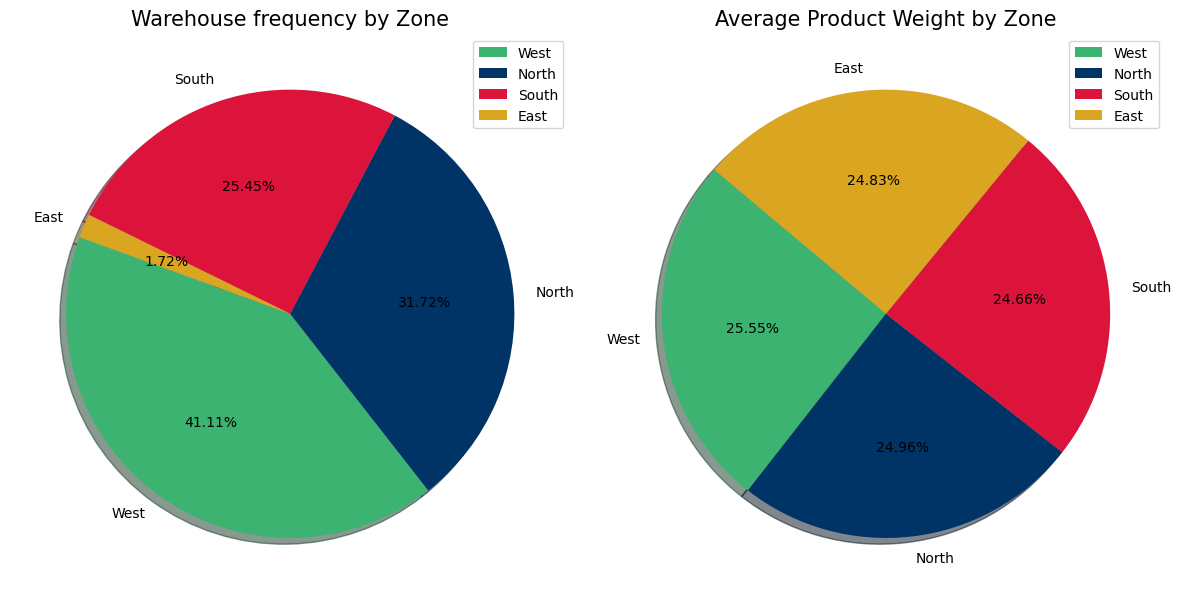

In [35]:
# Get unique labels, total counts, and mean product weights by zone
labels = df['zone'].unique().tolist()
size_total = df['zone'].value_counts().tolist()
colors = ['#3CB371', '#003366', '#DC143C', '#DAA520']
size_mean = df.groupby('zone')['product_wg_ton'].mean().tolist()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for frequency
axes[0].pie(size_total, colors=colors, labels=labels, shadow=True, autopct='%.2f%%', startangle=160)
axes[0].set_title('Warehouse frequency by Zone', fontsize=15)
axes[0].axis('off')
axes[0].legend()

# Pie chart for average product weight
axes[1].pie(size_mean, colors=colors, labels=labels, shadow=True, autopct='%.2f%%', startangle=140)
axes[1].set_title('Average Product Weight by Zone', fontsize=15)
axes[1].axis('off')
axes[1].legend()

# Adjust Layout for better visualization
plt.tight_layout()
# Show the plot
plt.show()

# Categorical variables Boxplot

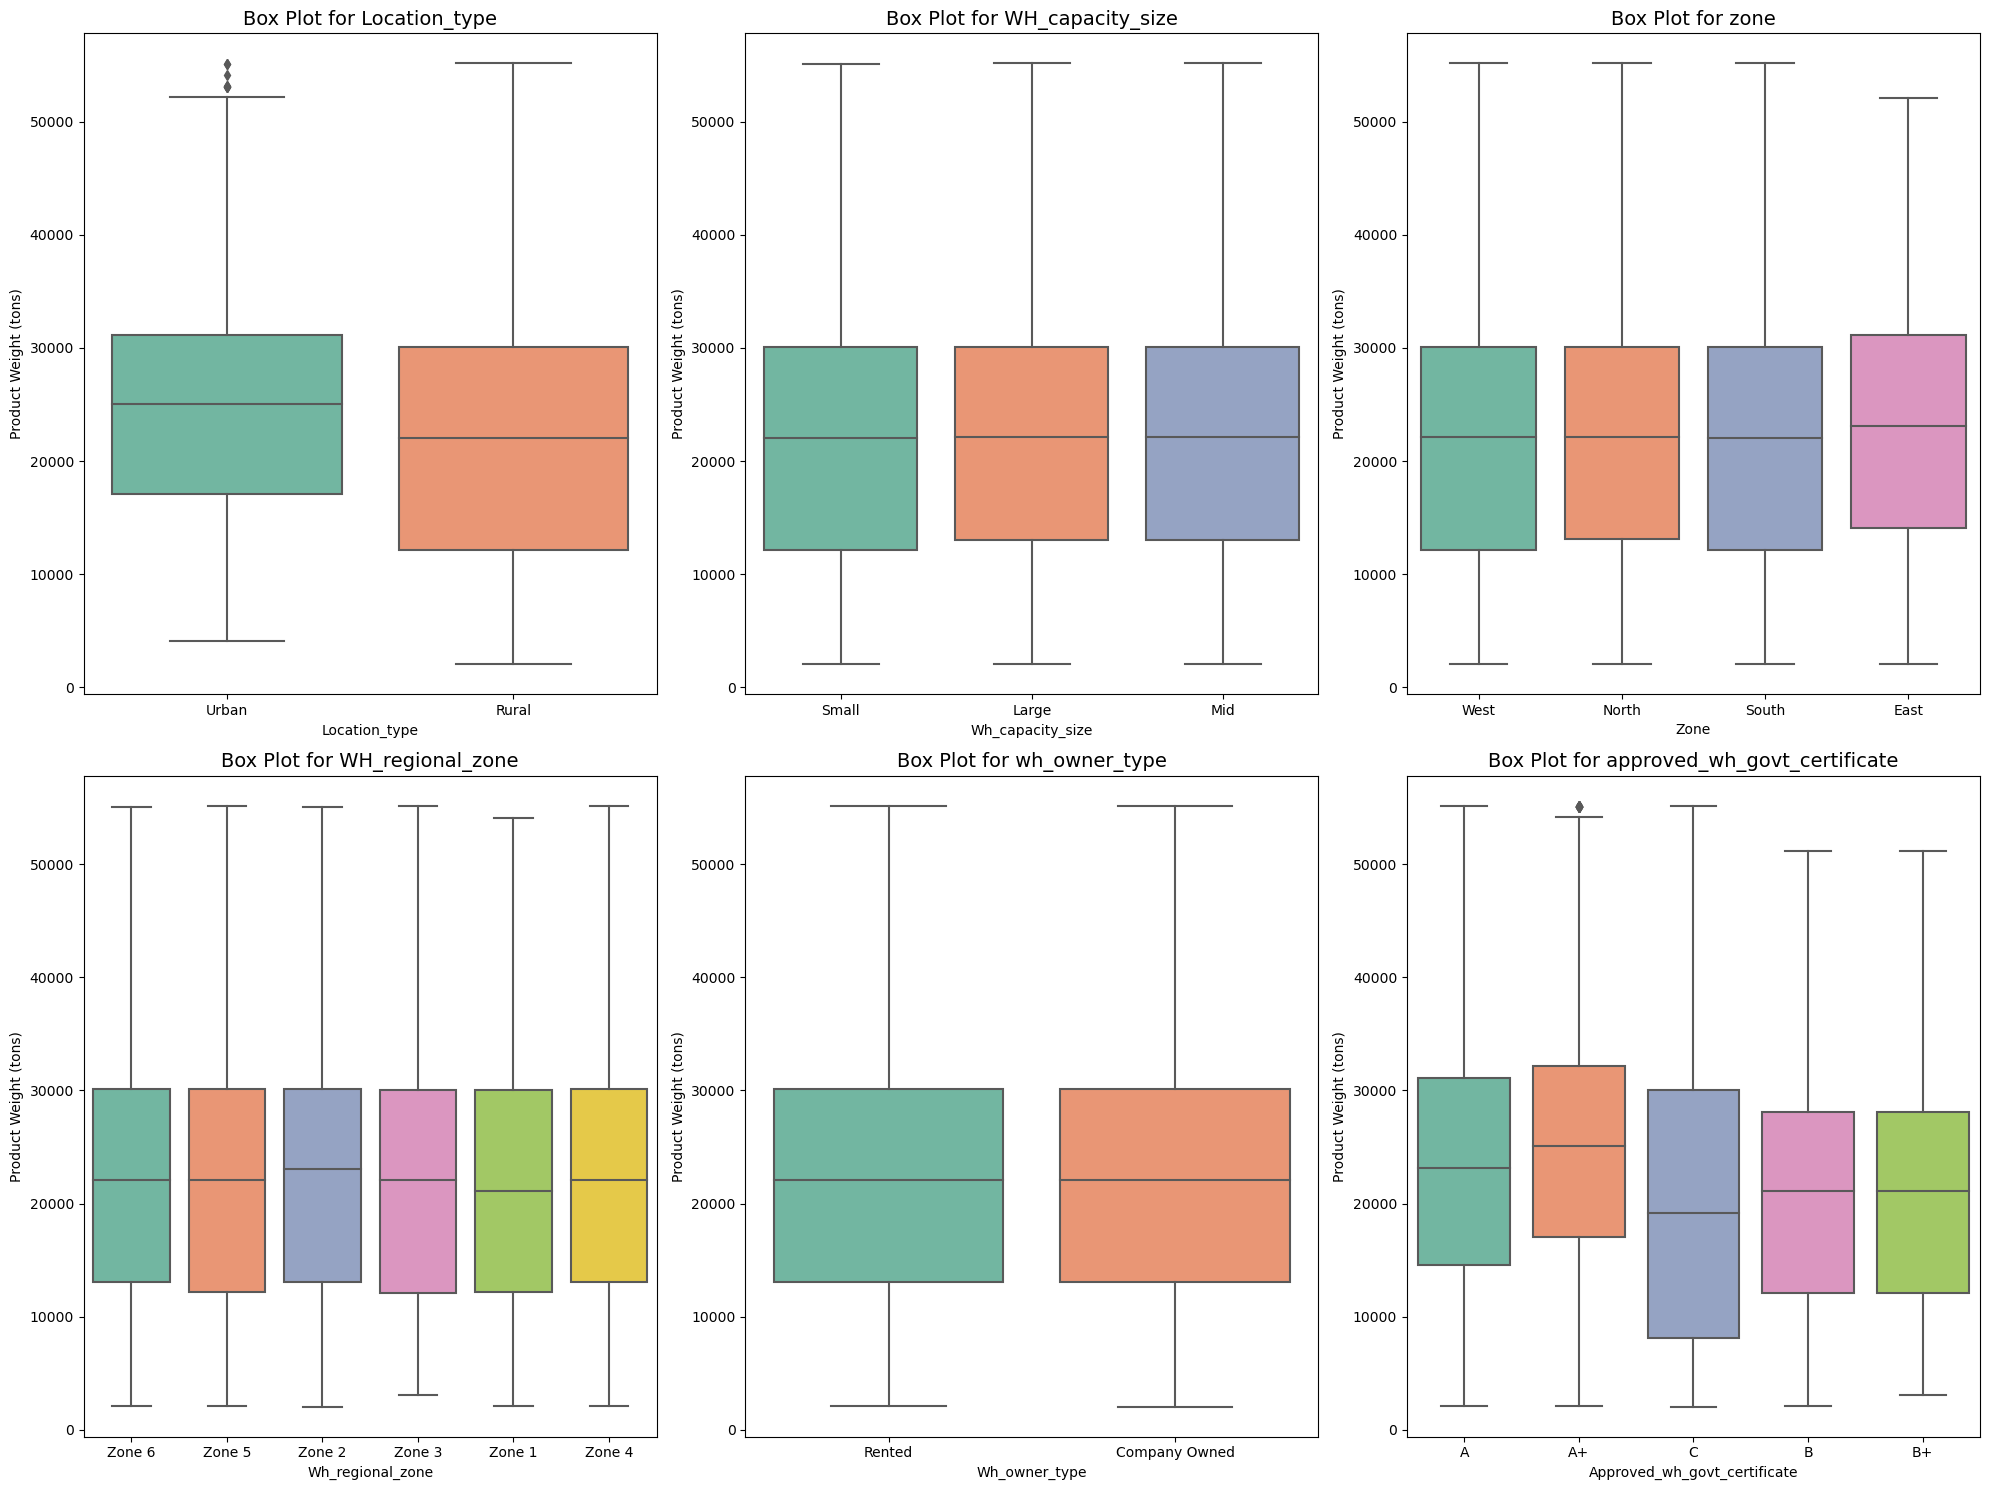

In [36]:
#Define a color palette (you can choose a different Seaborn color palette) 
palette = 'Set2'
categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate']
plt.figure(figsize=(20, 15))

#Loop through categorical variables
for i, variable in enumerate (categorical_variables, 1):
    plt.subplot(2, 3, i)
    
    # Use Seaborn's boxplot with a specified color palette
    sns.boxplot(x=variable, y='product_wg_ton', data=df, palette=palette)
    
    # Add Labels and title
    plt.xlabel(variable.capitalize()) # Capitalize the variable name for better readability
    
    plt.ylabel('Product Weight (tons)')
    plt.title(f'Box Plot for {variable}', fontsize=14)
    
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Numeric variables

C:\Users\HP\AppData\Local\Temp\ipykernel_7796\1906054128.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x='product_wg_ton', fill=True, palette='viridis')


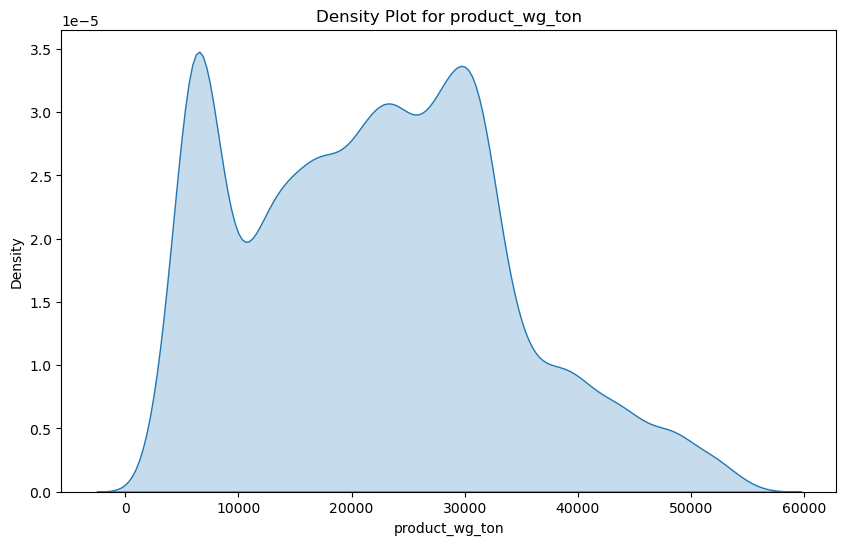

In [39]:
df.duplicated().sum()
#Density Plot for Dependent Variable 'product_wg_ton'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='product_wg_ton', fill=True, palette='viridis')
plt.title('Density Plot for product_wg_ton')
plt.xlabel('product_wg_ton')
plt.show()
            


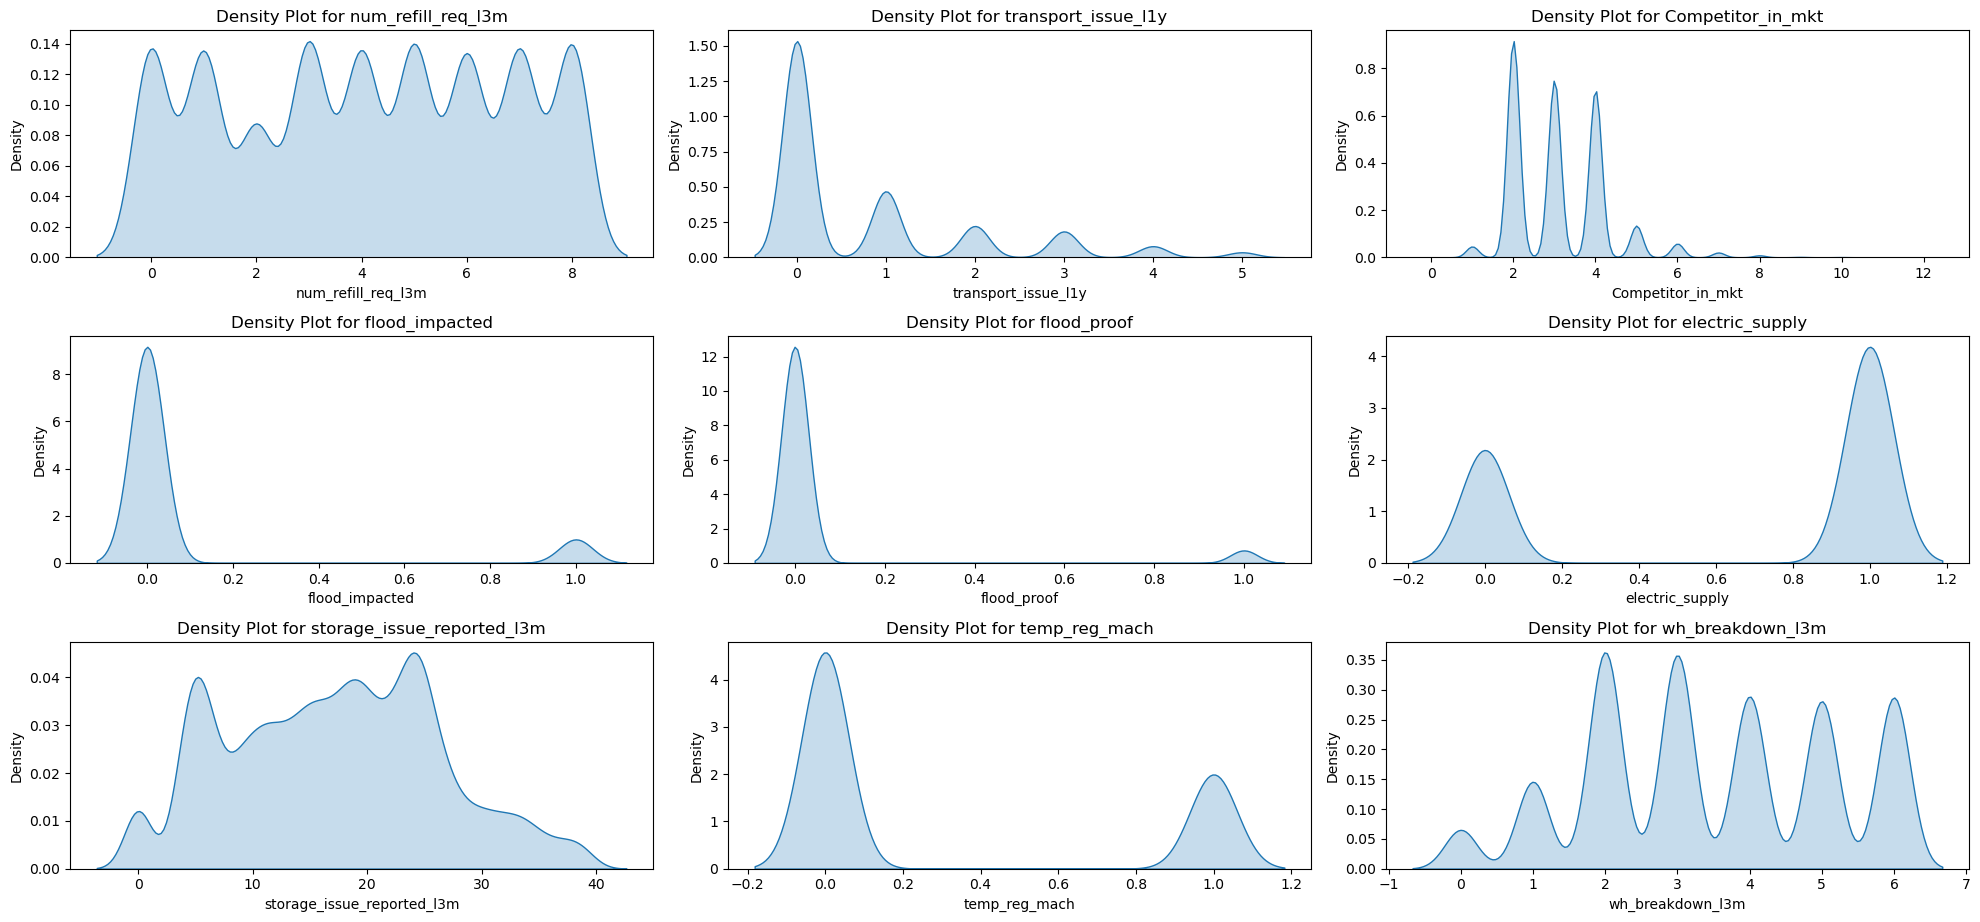

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables for density plots
numeric_variables = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'flood_impacted', 'flood_proof', 'electric_supply', 'storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m']

# Set up the figure and subplots
plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df, x=variable, fill=True)
    plt.title(f'Density Plot for {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()


# Categorical variables

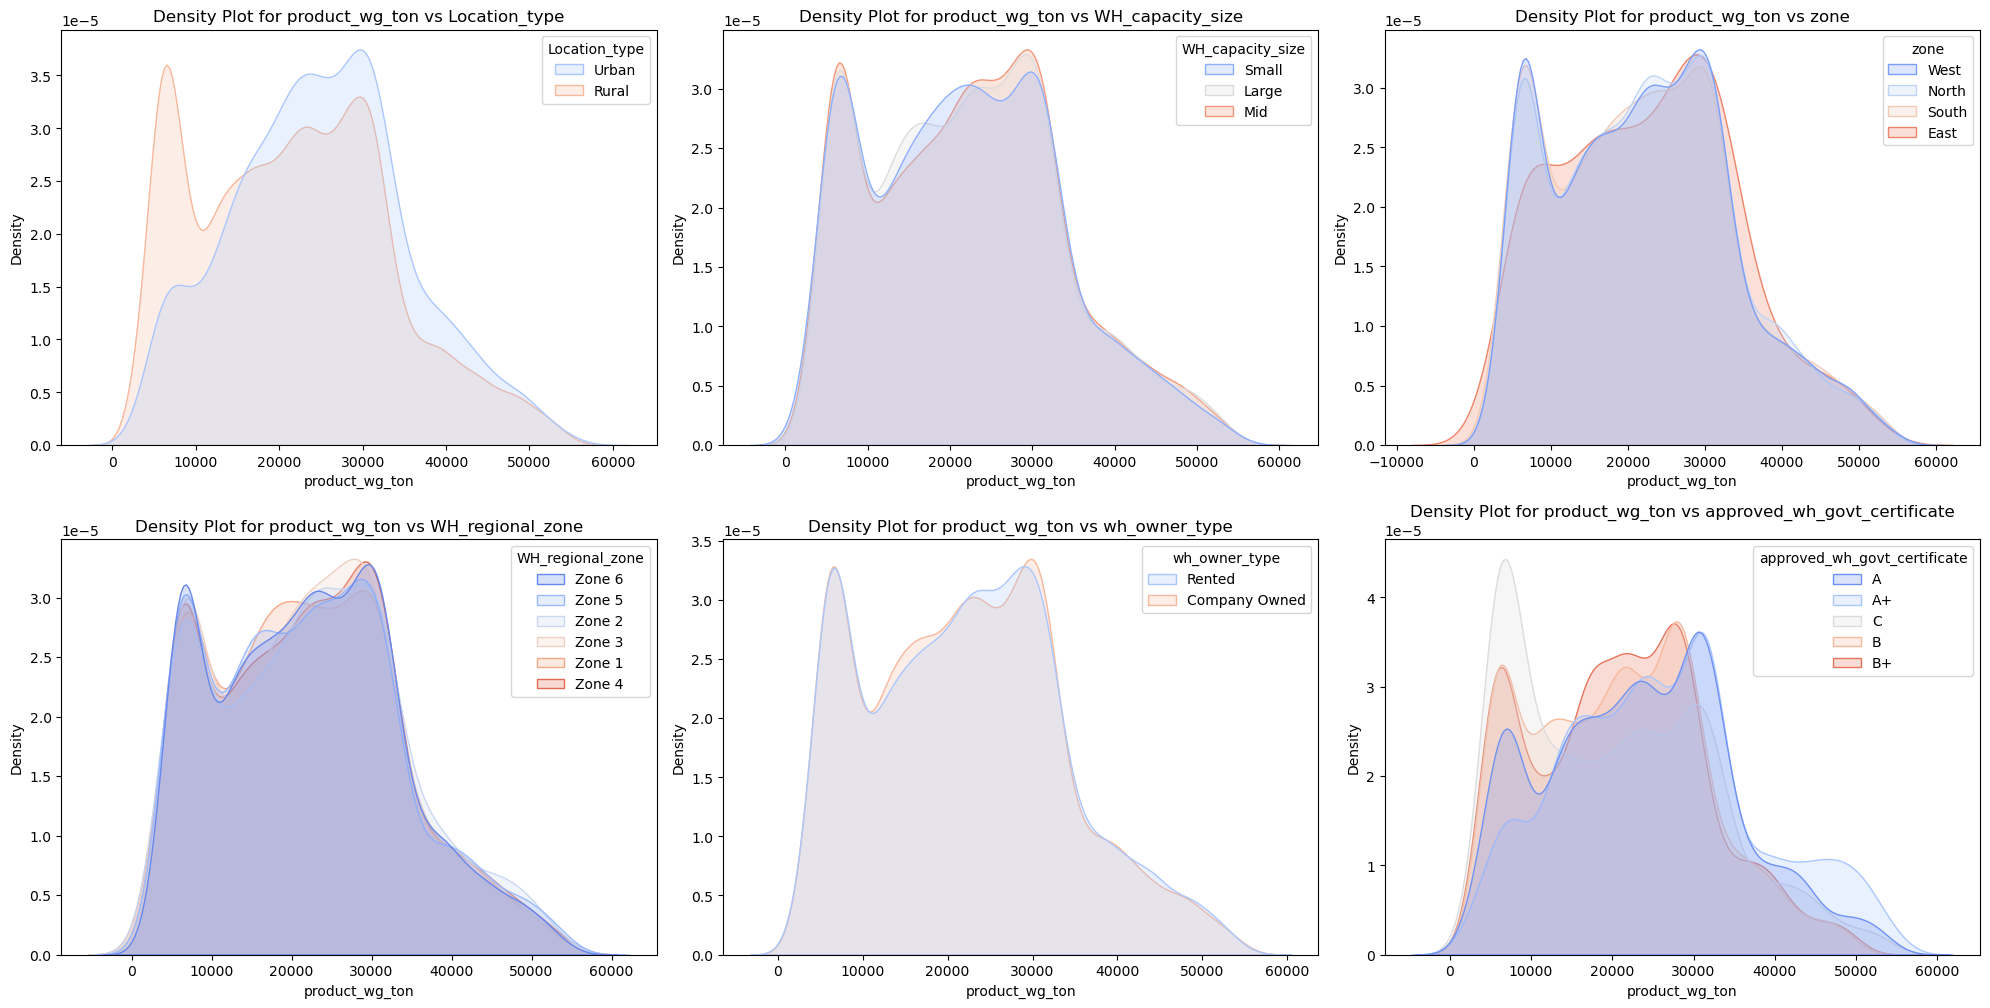

In [49]:
# List of Categorical Variables
categorical_variables = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

# Check if all categorical variables exist in the DataFrame and are of correct type
for var in categorical_variables:
    if var not in df.columns:
        raise ValueError(f"Column '{var}' does not exist in the DataFrame.")
    if not pd.api.types.is_categorical_dtype(df[var]) and not pd.api.types.is_object_dtype(df[var]):
        print(f"Warning: Column '{var}' is not categorical or object type. Consider converting it.")

# Create Subplots for Density Plots of Categorical Variables
plt.figure(figsize=(20, 15))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data=df, x='product_wg_ton', hue=variable, fill=True, common_norm=False, palette='coolwarm') 
    plt.title(f'Density Plot for product_wg_ton vs {variable}')
    plt.xlabel('product_wg_ton')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [52]:
# Import the LabelEncoder class from scikit-Learn 
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df['Location_type'] = le.fit_transform(df['Location_type'])

# Encode 'WH_capacity_size' column
df['WH_capacity_size'] = le.fit_transform(df[ 'WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

# Encode 'zone' column
df['zone'] = le.fit_transform(df['zone'])
                              
# Encode 'WH_regional_zone' column
df['WH_regional_zone'] = le.fit_transform(df[ 'WH_regional_zone'])

# Encode 'wh_owner_type' column
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])
                              
df.shape

(25000, 16)

# Label Encoding

In [55]:
# Import the LabelEncoder class from scikit-Learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df['Location_type'] = le.fit_transform(df['Location_type'])

# Encode 'WH_capacity_size' column
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

# Encode 'zone' column
df['zone'] = le.fit_transform(df['zone'])

# Encode 'WH_regional_zone' column
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

# Encode 'wh_owner_type' column
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])
x = df.drop(['product_wg_ton'], axis=1)
y = df[['product_wg_ton']]

# Data split train and test

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(5000, 15)
(5000, 1)
(20000, 15)
(20000, 1)


# Model Building

In [60]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2) 
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product weight - {model_name}')
    plt.show()


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'product_wg_ton' is the target variable

# Separate features and target variable
x_train = df.drop('product_wg_ton', axis=1)  # Features
y_train = df['product_wg_ton']  # Target variable

x_test = df.drop('product_wg_ton', axis=1)
y_test = df['product_wg_ton']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled can be used for model training and evaluation


# 1 Linear Regression

In [91]:

# Initialize and train Linear Regression model 
linear_reg_model = LinearRegression() 
linear_reg_model.fit(x_train_scaled, y_train)

LinearRegression()

In [92]:
# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(x_test_scaled) 
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions) 
linear_reg_r2 = r2_score (y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}')
print(f'Linear Regression - R-squared: {linear_reg_r2}')

Linear Regression - MSE: 3008923.7840018175
Linear Regression - R-squared: 0.9775117565459082


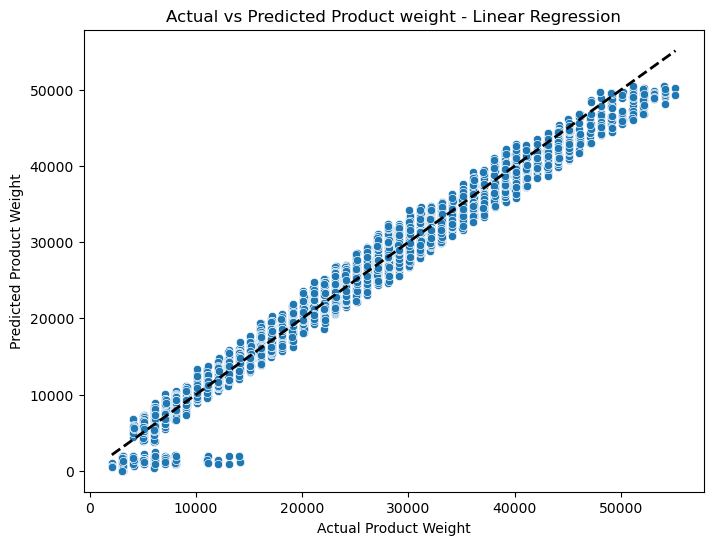

In [93]:
#scatterplot for Linear Regression Model
scatter_plot('Linear Regression',y_test,linear_reg_predictions)

# 2 Decision Tree

In [94]:
#initialize and train decision tree model
decision_tree_model=DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [95]:
# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(x_test_scaled) 
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}')
print(f'Decision Tree - R-squared: {decision_tree_r2}')

Decision Tree - MSE: 1692001.43925
Decision Tree - R-squared: 0.9873542359255368


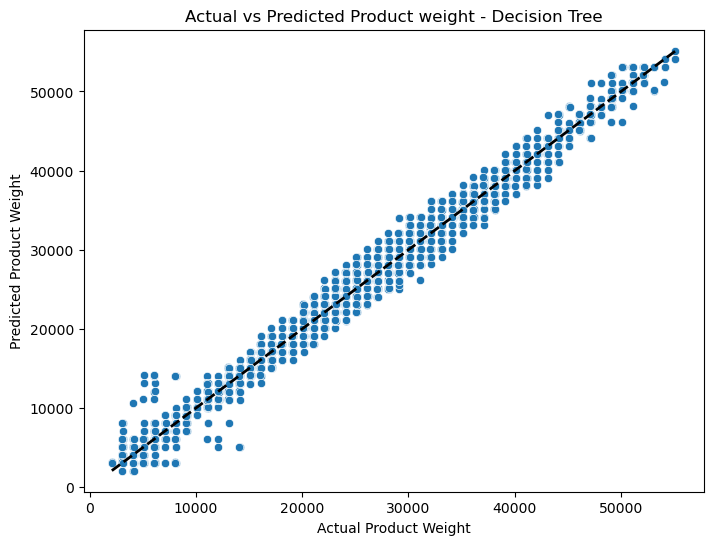

In [96]:
# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, decision_tree_predictions)

# 3 Random Forest

In [97]:
# Initialize and train Random Forest model 
random_forest_model = RandomForestRegressor() 
random_forest_model.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [98]:
# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(x_test_scaled) 
random_forest_mse = mean_squared_error(y_test, random_forest_predictions) 
random_forest_r2 = r2_score (y_test, random_forest_predictions) 
print(f'Random Forest - MSE: {random_forest_mse}')
print (f'Random Forest - R-squared: {random_forest_r2}')

Random Forest - MSE: 923990.8359393073
Random Forest - R-squared: 0.9930942315726198


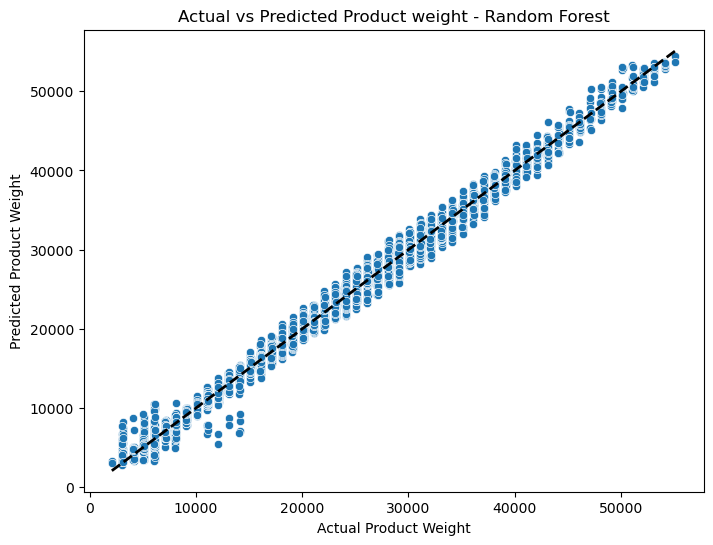

In [100]:
# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

# 4 Support Vector Machine (SVR)

In [103]:
# Initialize and train Support Vector Machine (SVR) model 
svr_model = SVR() 
svr_model.fit(x_train_scaled, y_train)

SVR()

In [104]:
#Evaluate SVR model
svr_predictions = svr_model.predict(x_test_scaled) 
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score (y_test, svr_predictions)
print(f'SVR - MSE {svr_mse}')
print (f'SVR - R-squared: {svr_r2}')

SVR - MSE 124820313.89410087
SVR - R-squared: 0.06711176208874914


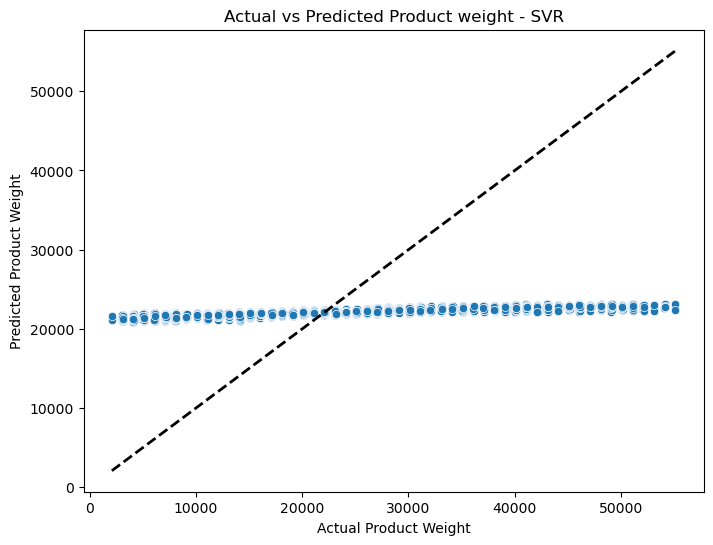

In [105]:
# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_predictions)

# 5 XGBoost

In [106]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor() 
xgboost_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [107]:
#Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(x_test_scaled) 
xgboost_mse = mean_squared_error(y_test, xgboost_predictions) 
xgboost_r2 = r2_score(y_test, xgboost_predictions) 
print (f'XGBoost MSE: {xgboost_mse}, ')
print (f'XGBoost R-squared: {xgboost_r2}')

XGBoost MSE: 861227.0356509456, 
XGBoost R-squared: 0.9935633187686775


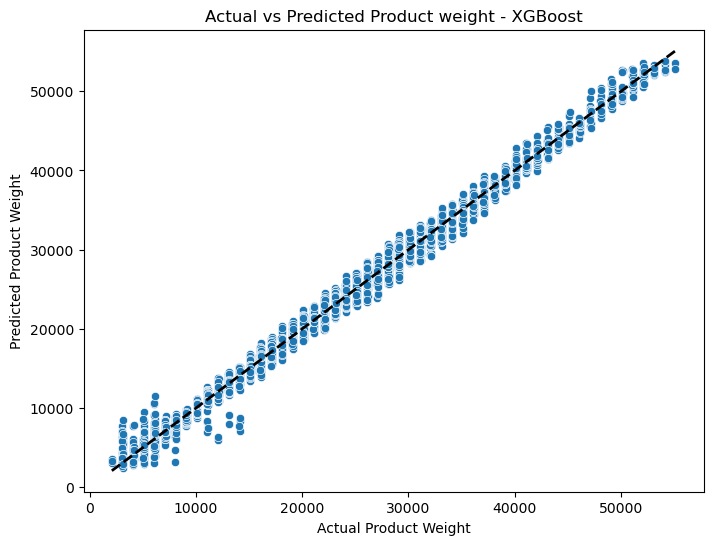

In [108]:
#Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

# 6 Neural Network

In [109]:
# Initialize and train Neural Network model 
neural_network_model = MLPRegressor(max_iter=1000) 
neural_network_model.fit(x_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

In [110]:
#Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_test_scaled) 
neural_network_mse = mean_squared_error(y_test, neural_network_predictions) 
neural_network_r2 = r2_score (y_test, neural_network_predictions) 
print (f'Neural Network - MSE: {neural_network_mse}')
print (f'Neural Network - R-squared: {neural_network_r2}')

Neural Network - MSE: 1287530.7554593582
Neural Network - R-squared: 0.9903771889346787


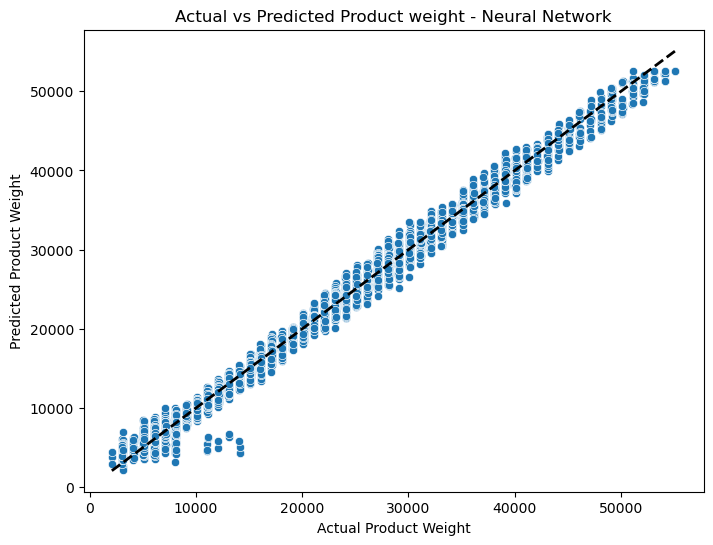

In [111]:
# Scatter plot for Neural Network model
scatter_plot('Neural Network', y_test, neural_network_predictions)

# 7 Actual vs Predicted Product Weight for Different Models

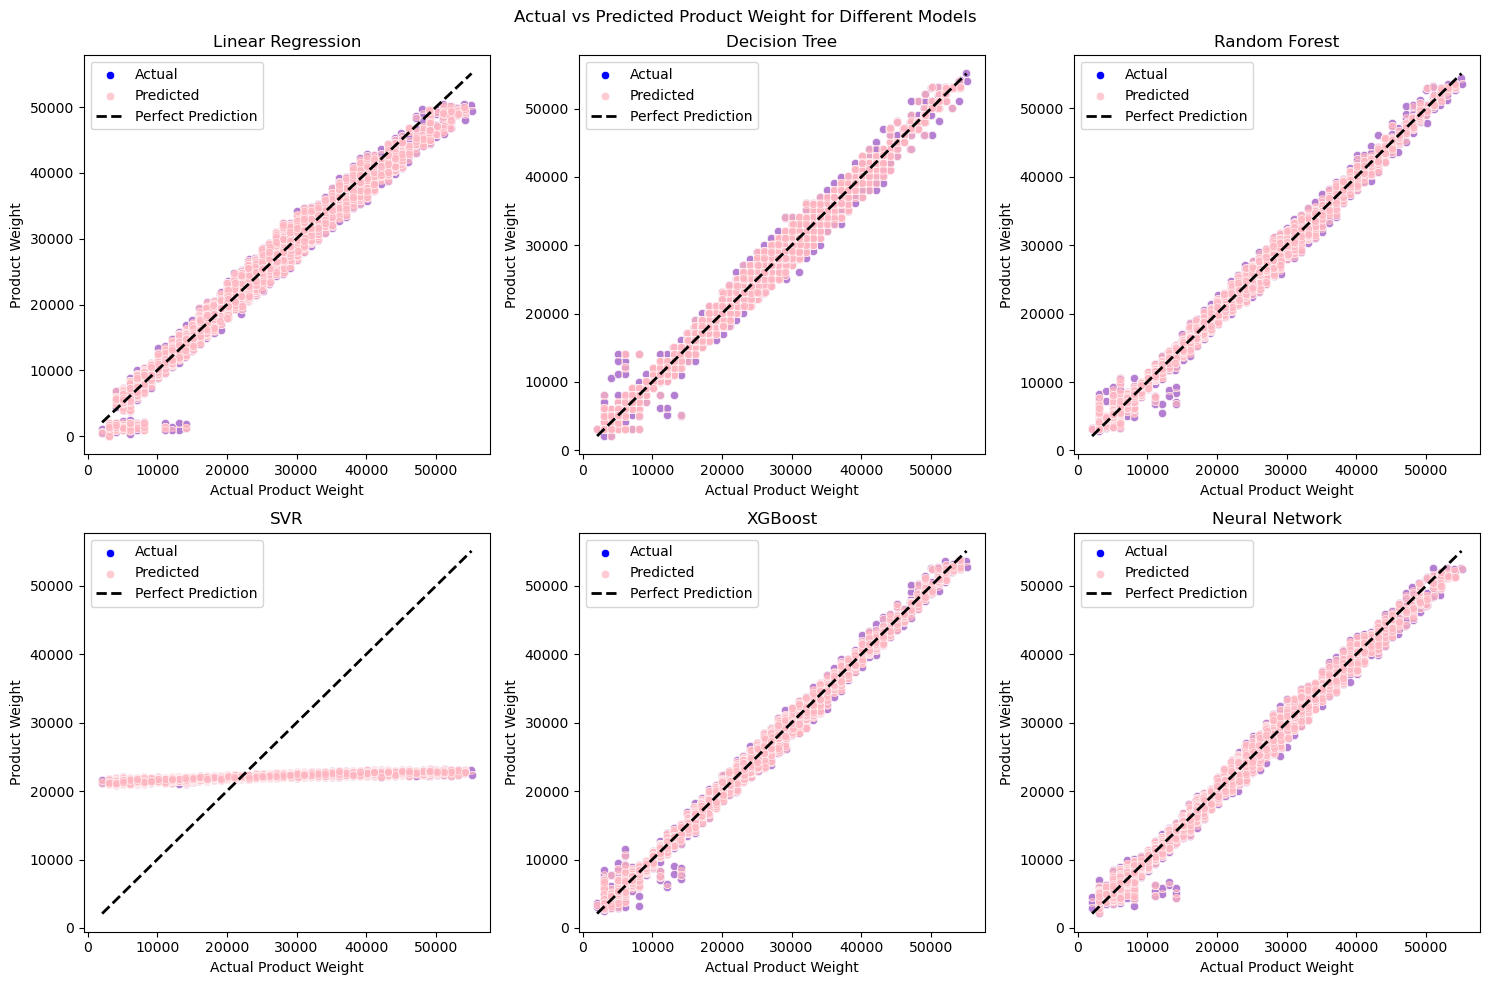

In [113]:
# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': linear_reg_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions, 
    'SVR': svr_predictions,
    'XGBoost': xgboost_predictions,
    'Neural Network': neural_network_predictions
})

# Create subplots for each model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Actual vs Predicted Product Weight for Different Models',)
# Flatten the 2D array of subplots for easy iteration
axes = axes.flatten()

# Loop through each model and plot its scatter plot with different colors
for i, model_name in enumerate(results_df.columns[1:]):
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='blue', label='Actual')
    sns.scatterplot(x='Actual', y=model_name, data=results_df, ax=axes[i], color='lightpink', label='Predicted', alpha=0.7) 
    axes[i].plot([results_df['Actual'].min(), results_df['Actual'].max()],[results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2, label='Perfect Prediction')
    axes[i].set_xlabel('Actual Product Weight')
    axes[i].set_ylabel('Product Weight')
    axes[i].set_title(model_name)
    axes[i].legend()
                                                                                      
# Adjust Layout 
plt.tight_layout() 
plt.show()                                                           

# Check Best Model

In [118]:
# Create a DataFrame to store model names, R2 scores, MSE, and Accuracy Percentage 
results_df = pd.DataFrame({

   'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'], 
   'R2 Score': [linear_reg_r2, decision_tree_r2, random_forest_r2, svr_r2, xgboost_r2, neural_network_r2], 
   'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})
# Calculate the accuracy percentage based on R2 Score
results_df['R2 Score Percentage'] = (results_df['R2 Score'] * 100).round(2)

# Find the best model (Lowest MSE)
best_model = results_df.loc[results_df[ 'MSE'].idxmin()]

# Display the results print("Model Comparison:") print (results_df)
print("\nBest Model:")
print (f" {best_model['Model']} has the lowest MSE: {best_model['MSE']} and the highest R2 Score:{best_model['R2 Score']}")


Best Model:
 XGBoost has the lowest MSE: 861227.0356509456 and the highest R2 Score:0.9935633187686775


# Data save in CSV

In [119]:
# Create a DataFrame to store actual vs predicted values for each model 
results_df = pd.DataFrame({

'Actual Product Weight': y_test,
'Linear Regression': linear_reg_predictions, 
'Decision Tree': decision_tree_predictions, 
'Random Forest': random_forest_predictions, 
'SVR': svr_predictions,
'XGBoost': xgboost_predictions,
'Neural Network': neural_network_predictions
})

# Specify the file path where you want to save the CSV file 
file_path = 'predicted_vs_actual_data.csv'

# Save the DataFrame to a CSV file
results_df.to_csv(file_path, index=False)
print("Predicted vs Actual values saved to", file_path)

Predicted vs Actual values saved to predicted_vs_actual_data.csv
